 ##                                         Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('7.1Position Salaries.csv')
data.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
data.shape

(10, 3)

In [4]:
data.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [5]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

## statistical analysis

In [6]:
data.describe() 


,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [7]:
x=data.iloc[: ,1:2].values
y=data.iloc[:,-1].values
#x=data[['Level']].values      
#y=data['Salary'].values

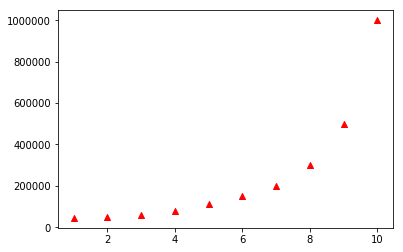

In [8]:
plt.scatter(x , y, color='red',marker='^')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x,y) # lr is linear regression at point 6.5
print(lr1.predict([[6.5]])) # prection at 6.5

print(lr1.score(x,y)) # training score

[330378.78787879]
0.6690412331929895


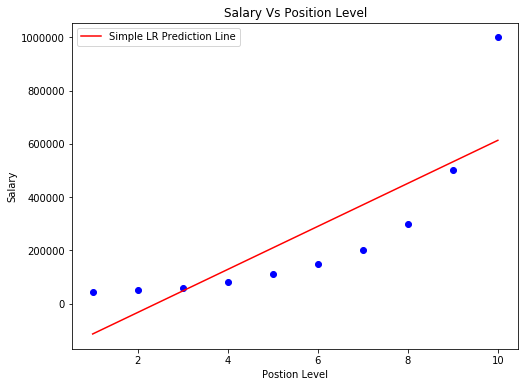

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue')
plt.plot(x,lr1.predict(x),color='red',label='Simple LR Prediction Line')
plt.title('Salary Vs Position Level')
plt.xlabel('Postion Level')
plt.ylabel('Salary')
plt.legend() # it show which line indicate which graph
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
pr2=PolynomialFeatures(degree=2)
x_poly2=pr2.fit_transform(x)
x_poly2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [12]:
lr2=LinearRegression()
lr2.fit(x_poly2,y)
print(lr2.predict(pr2.fit_transform([[6.5]])))
print(lr2.score(x_poly2,y))

[189498.10606061]
0.9162082221443942


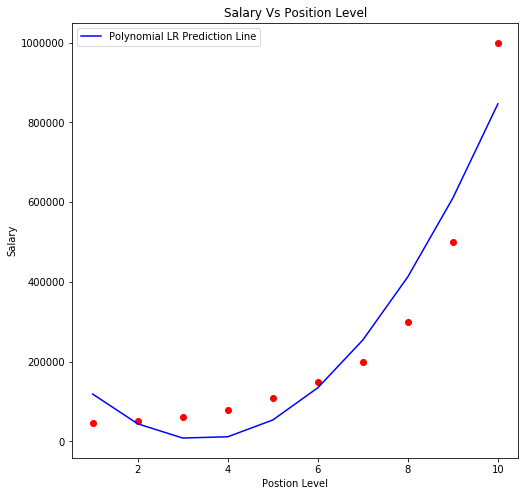

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(x, y, color='red')
plt.plot(x,lr2.predict(x_poly2),color='blue',label='Polynomial LR Prediction Line')
plt.title('Salary Vs Position Level')
plt.xlabel('Postion Level')
plt.ylabel('Salary')
plt.legend() # it show which line indicate which graph
plt.show()

In [14]:
pr3=PolynomialFeatures(degree=3)
x_poly3=pr3.fit_transform(x)

lr3=LinearRegression()
lr3.fit(x_poly3,y)
print(lr3.predict(pr3.fit_transform([[6.5]])))
print(lr3.score(x_poly3,y))
plt.show()

[133259.46969697]
0.9812097727913367


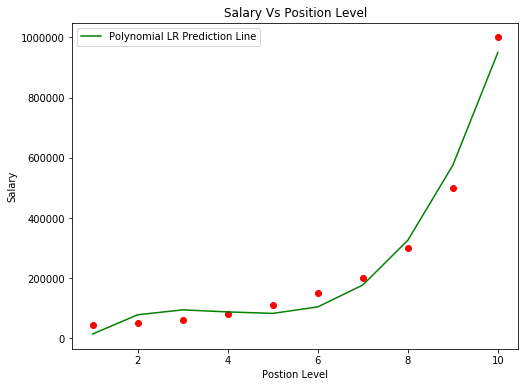

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='red')
plt.plot(x,lr3.predict(x_poly3),color='green',label='Polynomial LR Prediction Line')
plt.title('Salary Vs Position Level')
plt.xlabel('Postion Level')
plt.ylabel('Salary')
plt.legend() # it show which line indicate which graph
plt.show()

In [16]:
pr4=PolynomialFeatures(degree=4)
x_poly4=pr4.fit_transform(x)

lr4=LinearRegression()
lr4.fit(x_poly4,y)
print(lr4.predict(pr4.fit_transform([[6.5]])))
print(lr4.score(x_poly4,y))
plt.show()

[158862.4526516]
0.9973922891706614


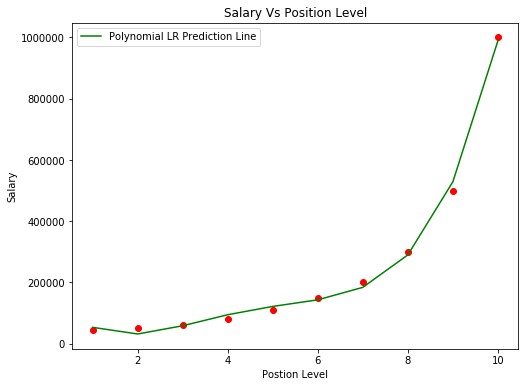

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='red')
plt.plot(x,lr4.predict(x_poly4),color='green',label='Polynomial LR Prediction Line')
plt.title('Salary Vs Position Level')
plt.xlabel('Postion Level')
plt.ylabel('Salary')
plt.legend() # it show which line indicate which graph
plt.show()

In [18]:
pr5=PolynomialFeatures(degree=4)
x_poly5=pr5.fit_transform(x)

lr5=LinearRegression()
lr5.fit(x_poly5,y)
print(lr5.predict(pr5.fit_transform([[6.5]])))
print(lr5.score(x_poly5,y))

[158862.4526516]
0.9973922891706614


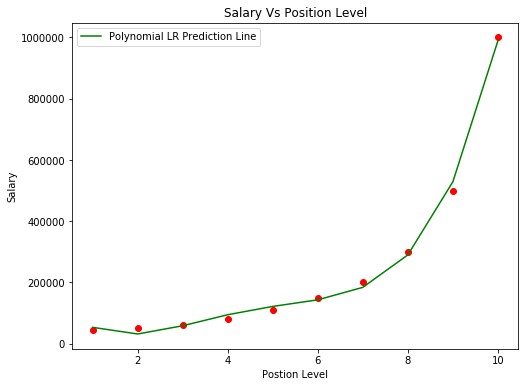

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='red')
plt.plot(x,lr5.predict(x_poly5),color='green',label='Polynomial LR Prediction Line')
plt.title('Salary Vs Position Level')
plt.xlabel('Postion Level')
plt.ylabel('Salary')
plt.legend() # it show which line indicate which graph
plt.show()

# over trained bueause it having accuracy at 99.7%
  after 4th degree of the data set

In [20]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1.0,random_state=0) # ridge is nothing but class of regression

In [21]:
rr.fit(x_poly5,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)

In [22]:
print(rr.score(x_poly5,y))
print(rr.predict(pr5.fit_transform([[6.5]])))

0.9936094391254978
[144506.61246557]


In [26]:
for i in [0, 1, 10000000, 10000000, 100000000, 15000000000]:
    rr = Ridge(alpha=i, random_state=0)
    rr.fit(x_poly5,y)
    print(f'Training score for alpha = {i} is {rr.score(x_poly5,y)}')
    print(f'Prediction of salary={rr.predict(pr5.fit_transform([[6.5]]))}')
    print()

Training score for alpha = 0 is 0.9973922891706611
Prediction of salary=[158862.45265157]

Training score for alpha = 1 is 0.9936094391254978
Prediction of salary=[144506.61246557]

Training score for alpha = 10000000 is 0.9531433446652086
Prediction of salary=[190733.05682571]

Training score for alpha = 10000000 is 0.9531433446652086
Prediction of salary=[190733.05682571]

Training score for alpha = 100000000 is 0.7310026551289139
Prediction of salary=[216618.04673084]

Training score for alpha = 15000000000 is 0.013257103887899245
Prediction of salary=[249054.62199417]



after tradeoff point predicted salary again gradually increses

 # lasso class

In [27]:
from sklearn.linear_model import Lasso
ls= Lasso(alpha = 1000000.0,random_state=0)
ls.fit(x_poly5,y)

Lasso(alpha=1000000.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
print(ls.score(x_poly5,y))
print(ls.predict(pr5.fit_transform([[6.5]])))

0.9711682474290015
[170017.26220296]


In [30]:
for i in [0, 1, 10000000, 10000000, 100000000, 15000000000]:
    ls = Lasso(alpha=i, random_state=0)
    ls.fit(x_poly5,y)
    print(f'Training score for alpha = {i} is {ls.score(x_poly5,y)}')
    print(f'Prediction of salary={ls.predict(pr5.fit_transform([[6.5]]))}')
    print()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause preci

Training score for alpha = 0 is 0.9873844682474401
Prediction of salary=[136029.22492944]

Training score for alpha = 1 is 0.987384869601315
Prediction of salary=[136029.93137314]

Training score for alpha = 10000000 is 0.9606163013862872
Prediction of salary=[185494.78216351]

Training score for alpha = 10000000 is 0.9606163013862872
Prediction of salary=[185494.78216351]

Training score for alpha = 100000000 is 0.9487642707398783
Prediction of salary=[191997.72420042]

Training score for alpha = 15000000000 is 0.0
Prediction of salary=[249500.]

